In [1]:
from prody import *
from matplotlib.pylab import *
from sklearn import*
import sklearn
import numpy 
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
 

/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/akp47/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  

In [2]:
ion()

In [3]:
# using the pickle file from HAN getting the refined sequences

import _pickle as cPickle
SEQ, consensus = cPickle.load(open("SEQ3_tauraw.pkl","rb"))
print (len(consensus))
print(len(SEQ))
msa = numpy.asarray(SEQ)
msa_refine = numpy.chararray((9444,130))
for i in range(6210):
    msa_refine[i] = msa[i]

130
9444


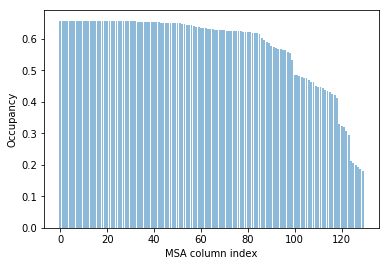

In [4]:
y = numpy.array([1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
calcMSAOccupancy(msa_refine, occ='res').min()
occ = calcMSAOccupancy(msa_refine, occ='res')
y_pos = numpy.arange(len(occ))
plt.bar(y_pos, occ, align='center', alpha=0.5)
plt.xlabel('MSA column index')
plt.ylabel('Occupancy')
plt.show()

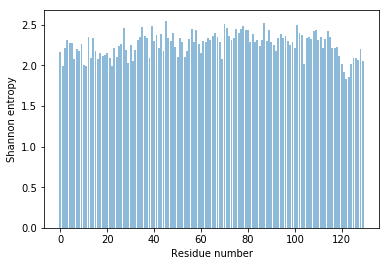

In [5]:
entropy = calcShannonEntropy(msa_refine)
y_pos = numpy.arange(len(occ))
plt.bar(y_pos, entropy, align='center', alpha=0.5)
plt.xlabel('Residue number')
plt.ylabel('Shannon entropy')
plt.show()

## Mutual Information

@> Mutual information matrix was calculated in 0.30s.


(<matplotlib.image.AxesImage at 0x7fa29646a9e8>,
 <matplotlib.colorbar.Colorbar at 0x7fa296425320>)

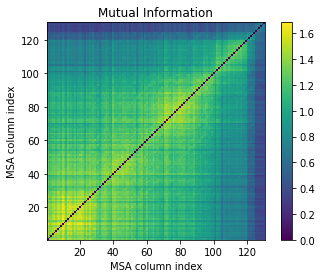

In [6]:
mutinfo = buildMutinfoMatrix(msa_refine)
showMutinfoMatrix(mutinfo)

In [7]:
from sklearn import metrics
mi_avg=numpy.mean(mutinfo,axis=0)
SEQ_LENGTH = 130;
dataauc=mi_avg
# Make attn = 1 if >0.1
y_ = np.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.6461538461538462 ROC AUC 0.5049171842650104


## MIp 

(<matplotlib.image.AxesImage at 0x7fa2963bb898>,
 <matplotlib.colorbar.Colorbar at 0x7fa294b681d0>)

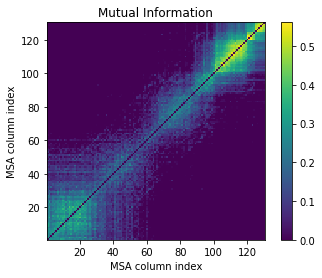

In [8]:
mutinfo_corr = applyMutinfoCorr(mutinfo, corr='apc')
showMutinfoMatrix(mutinfo_corr, clim=[0, mutinfo_corr.max()])

In [9]:
from sklearn import metrics
MIp_avg=numpy.mean(mutinfo_corr,axis=0)
SEQ_LENGTH = 130;
dataauc=MIp_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.5538461538461539 ROC AUC 0.43348861283643897


## OMES 

@> OMES matrix was calculated in 0.24s.


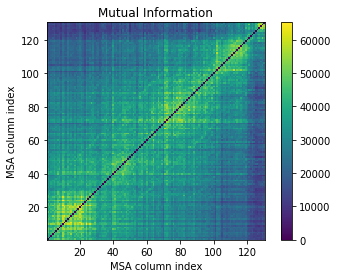

In [10]:
OMES_Matrix = buildOMESMatrix(msa_refine, ambiguity=True, turbo=True)
showMutinfoMatrix(OMES_Matrix, clim=[0, OMES_Matrix.max()]);

In [11]:
from sklearn import metrics
OMES_avg=numpy.mean(OMES_Matrix,axis=0)
SEQ_LENGTH = 130;
dataauc=OMES_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.6692307692307692 ROC AUC 0.5571946169772256


## PSICOV

@> PC matrix was calculated in 22.07s.


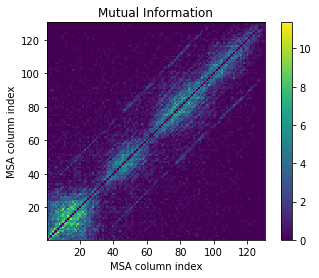

In [12]:
PSICOV= buildPCMatrix(msa_refine)
showMutinfoMatrix(PSICOV);

In [13]:
from sklearn import metrics
psicov_avg=numpy.mean(PSICOV,axis=0)
SEQ_LENGTH = 130;
dataauc=psicov_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.5 ROC AUC 0.3869047619047619


## SCA

@> SCA matrix was calculated in 0.39s.


(<matplotlib.image.AxesImage at 0x7fa29499f470>,
 <matplotlib.colorbar.Colorbar at 0x7fa294947e48>)

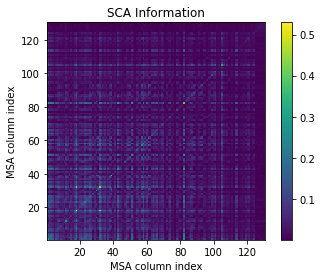

In [14]:
SCA = buildSCAMatrix(msa_refine, turbo=False)
showSCAMatrix(SCA)

In [15]:
from sklearn import metrics
sca_avg=numpy.mean(SCA,axis=0)
SEQ_LENGTH = 130;
dataauc=sca_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.5923076923076923 ROC AUC 0.48291925465838514


## DCA 

@> DI matrix was calculated in 6.31s.


(<matplotlib.image.AxesImage at 0x7fa294a3b2b0>,
 <matplotlib.colorbar.Colorbar at 0x7fa294a32908>)

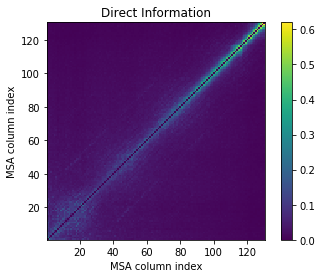

In [16]:
DI_Matrix = buildDirectInfoMatrix(msa_refine, turbo=False)
showDirectInfoMatrix(DI_Matrix)

In [17]:
from sklearn import metrics
DI_avg=numpy.mean(DI_Matrix,axis=0)
SEQ_LENGTH = 130;
dataauc=DI_avg
# Make attn = 1 if >0.1
y_ = numpy.zeros(SEQ_LENGTH)
y_ =[1*(dataauc[i]>(numpy.mean(dataauc)+1*numpy.std(dataauc))) for i in range(0,SEQ_LENGTH)  ]

#data_auc=metrics.auc(nums, y_)
#y_auc=metrics.auc(nums, y)
roc_auc = metrics.roc_auc_score(y,numpy.array(y_))
from sklearn.metrics import f1_score
f1=f1_score(y,numpy.array(y_), average='micro')  
print("F1",f1,"ROC AUC",roc_auc)

F1 0.6230769230769231 ROC AUC 0.4870600414078675
